In [1]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, Lambda, Flatten, Concatenate, Reshape, Conv2DTranspose
from keras.models import Sequential, Model, load_model

import keras.backend as K

Using TensorFlow backend.


In [2]:
train_input = np.loadtxt('input_2.csv', delimiter=',')
train_input = np.reshape(train_input, (-1, 512,512,1))

In [3]:
train_input = train_input[:175]
print(train_input.shape)

(175, 512, 512, 1)


In [4]:
# input_layer = Input(shape=(512,512,1))
# conv1 =  Conv2D(2, kernel_size=(5,5), strides=(4,4), padding='same', activation='relu')(input_layer)
# conv2 =  Conv2D(4, kernel_size=(5,5), strides=(4,4), padding='same', activation='relu')(conv1)
# conv3 =  Conv2D(8, kernel_size=(5,5), strides=(4,4), padding='same', activation='relu')(conv2)

# flatten = Flatten()(conv3)

# z_mean = Lambda(lambda x: K.mean(x, axis = 1))(flatten)
# z_mean = Reshape((-1,1))(z_mean)
# z_var = Lambda(lambda x: K.var(x, axis = 1))(flatten)
# z_var = Reshape((-1,1))(z_var)

# merge = Concatenate()([z_mean, z_var])


# encoder = Model(inputs = input_layer, outputs = merge)

In [5]:
# encoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# encoder.summary()

In [7]:
# input_layer = Input(shape=(1,2,))
# dense1 = Dense(512, activation='relu')(input_layer)
# reshape_layer = Reshape((8, 8, 8))(dense1)
# conv1 =  Conv2DTranspose(4, kernel_size=(5,5), strides=(4,4), padding='same', activation='relu')(reshape_layer)
# conv2 =  Conv2DTranspose(2, kernel_size=(5,5), strides=(4,4), padding='same', activation='relu')(conv1)
# output_layer =  Conv2DTranspose(1, kernel_size=(5,5), strides=(4,4), padding='same', activation='sigmoid')(conv2)


# decoder = Model(inputs = input_layer, outputs = output_layer)

In [8]:
# decoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# decoder.summary()

In [4]:
encoder = load_model('normal_encoder.h5')
decoder = load_model('normal_decoder.h5')

In [11]:
input_layer = Input(shape=(512, 512, 1))

encoder_layer = encoder(input_layer)

decoder_layer = decoder(encoder_layer)

total_model = Model(inputs=input_layer,outputs=decoder_layer)

In [12]:
total_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
model_1 (Model)              (None, 1, 2)              1064      
_________________________________________________________________
model_2 (Model)              (None, 512, 512, 1)       2593      
Total params: 3,657
Trainable params: 3,657
Non-trainable params: 0
_________________________________________________________________


In [13]:
total_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
noise_train_input = train_input + np.random.normal(0,1,train_input.shape)

In [ ]:
total_model.fit(noise_train_input, train_input,
               epochs = 100,
               batch_size=350,
               shuffle=True)

In [70]:
encoder.save('normal_encoder.h5')
decoder.save('normal_decoder.h5')

In [86]:
total_model.evaluate(noise_train_input, train_input)

175/175 [==============================] - 1s 4ms/step


[0.5876931003161839, 0.0]

In [ ]:
noise_train_input = train_input + np.random.normal(0,1,train_input.shape)

In [92]:
for i in range(10):
    total_model.fit(noise_train_input, train_input,
               epochs = 100,
               batch_size=350,
               shuffle=True, verbose = 0)

In [93]:
encoder.save('normal_encoder.h5')
decoder.save('normal_decoder.h5')

In [6]:
a = encoder.predict(train_input)

In [7]:
print(np.mean(a, axis=0))
print(np.var(a, axis=0))

[[3.4549891e-03 2.0229785e-05]]
[[2.8677147e-17 1.4591466e-21]]


In [95]:
print(a[0])
print(a[50])

[[0.08848938 0.01476633]]
[[0.07666418 0.01263762]]


In [96]:
b = decoder.predict(a)

In [97]:
print(b[0])

[[[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]

 [[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]

 [[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]

 ...

 [[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]

 [[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]

 [[0.7254897]
  [0.7254897]
  [0.7254897]
  ...
  [0.7254897]
  [0.7254897]
  [0.7254897]]]


In [98]:
from PIL import Image
import matplotlib.pyplot as plt 

In [99]:
img = np.reshape(b[0],(512,512))

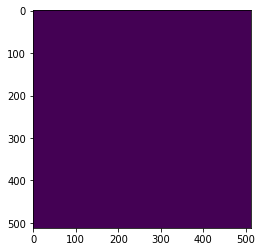

In [100]:
plt.imshow(img)